A simple project to illustrate the effect of PCA (pricipal component analysis) on the accuracy score.
In this project, we are going to do the following:
1. Load our dataset `heart.csv` data
2. Perform outlier detection and removal on some data features using zcore greater than -3 or less than 3.
3. Standardized our data
4. Building our machine learning model by comparing three different models (SVM, RandomForest, and Logistic Regression) on the same dataset.
5. Now, we apply Dimensionality reduction technique using pca to see how it affect model's performance.

In [3]:
# neccessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline
sns.set()

In [4]:
#import dataset
df = pd.read_csv('data/heart.csv')
#view dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Exploratory Data Analysis

In [5]:
#check for number of rows and columns
df.shape

(918, 12)

In [6]:
#check statistical information of our dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [23]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

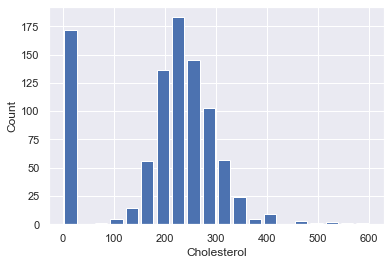

In [7]:
#plot a histogram on Cholesterol feature to detect outlier
plt.hist(df['Cholesterol'], bins=20, rwidth=0.8)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

From the distribution, we can say, it is not normal hence there is a presence of outlier

## Data Preprocessing

### Treating Outliers in our dataset

In [8]:
df[df['Cholesterol'] > (df['Cholesterol'].mean() + 3*df['Cholesterol'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


3 entries are detected to be outliers, hence let's drop outliers

In [9]:
df1 = df[df['Cholesterol'] <= (df['Cholesterol'].mean() + 3*df['Cholesterol'].std())]
df1.shape

(915, 12)

In [11]:
df.shape[0] - df1.shape[0]

3

In [12]:
df[df['RestingBP'] > (df['RestingBP'].mean() + 3*df['RestingBP'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


7 outliers detected on `RestingBP` column now, let's drop the outlier

In [13]:
df2 = df1[df1['RestingBP'] <= (df1['RestingBP'].mean() + 3*df1['RestingBP'].std())]
df2.shape

(908, 12)

In [14]:
df[df['Age'] > (df['Age'].mean() + 3*df['Age'])]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [15]:
df[df['FastingBS'] > (df['FastingBS'].mean() + 3*df['FastingBS'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [16]:
df[df['MaxHR'] > (df['MaxHR'].mean() + 3*df['MaxHR'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [17]:
df[df['Oldpeak'] > (df['Oldpeak'].mean() + 3*df['Oldpeak'].std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


6 outliers detected, now let's drop them.

In [18]:
df3 = df2[df2['Oldpeak'] <= df2['Oldpeak'].mean() + 3*df2['Oldpeak'].std()]
df3.shape

(902, 12)

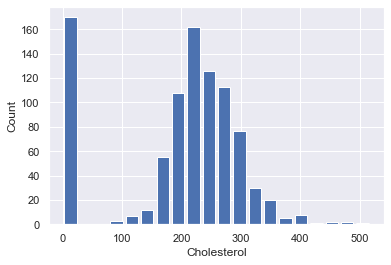

In [20]:
# let's check our cholesterol data distribution again
plt.hist(df3['Cholesterol'], bins=20, rwidth=0.8)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

Now, this is better.

In [21]:
#export the new dataframe with no outliers
df3.to_csv('data/heart_csv_without_outliers.csv', index=False)

In [22]:
#import the dataset 
df = pd.read_csv('data/heart_csv_without_outliers.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Convert text columns to numerical

In [24]:
df_temp = df.copy()

In [25]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [26]:
df_temp['Sex'].unique()

array(['M', 'F'], dtype=object)

In [27]:
df_temp['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [28]:
df_temp['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [29]:
df_temp['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [30]:
df_temp['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [31]:
df_temp['Sex'].replace({
    
    'M' : 0,
    'F' :1
}, inplace=True)
df_temp['RestingECG'].replace({
    
    'Normal' : 1,
    'ST' : 2,
    'LVH' : 3
}, inplace=True)
df_temp['ExerciseAngina'].replace({
    
    'N': 0,
    'Y': 1
}, inplace=True)
df_temp['ST_Slope'].replace({
    'Up' : 1,
    'Flat': 2,
    'Down': 3
}, inplace=True)

df_temp.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,1,172,0,0.0,1,0
1,49,1,NAP,160,180,0,1,156,0,1.0,2,1
2,37,0,ATA,130,283,0,2,98,0,0.0,1,0
3,48,1,ASY,138,214,0,1,108,1,1.5,2,1
4,54,0,NAP,150,195,0,1,122,0,0.0,1,0


Great! Now, let's apply labelencoder to our `ChestPainType` colum.

In [32]:
le = LabelEncoder()
df_temp['ChestPainType'] = le.fit_transform(df_temp['ChestPainType'])
df_temp.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,1,0
1,49,1,2,160,180,0,1,156,0,1.0,2,1
2,37,0,1,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,1,108,1,1.5,2,1
4,54,0,2,150,195,0,1,122,0,0.0,1,0


Now that we have successfully transformed all categorical columns to numerical; we now standardized our independent variable (X)

In [33]:
#split our dataset into features and label
X = df_temp.drop('HeartDisease', axis=1)
y = df_temp.HeartDisease

In [37]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled.shape)

(902, 11)


In [38]:
# split our dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
len(X_test)

271

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((631, 11), (271, 11), (631,), (271,))

#### Model Building and Evaluation

In [57]:
models = {'SVM' : svm.SVC(),
         'RandomForestClassifier' : RandomForestClassifier(),
         'LogisticRegression': LogisticRegression()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]= model.score(X_test, y_test)
    return model_scores

In [58]:
model_scores  = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'SVM': 0.8819188191881919,
 'RandomForestClassifier': 0.9040590405904059,
 'LogisticRegression': 0.8745387453874539}

In [60]:
# let's visualize the model scores
model_df = pd.DataFrame(model_scores,
                       index=np.arange(1, 2, 1))
model_df

,SVM,RandomForestClassifier,LogisticRegression
1,0.881919,0.904059,0.874539


We can see that the `RandomForest classifier` performs better. Now, let's see the effect on the model performance after applying PCA

In [66]:
pca = PCA(0.95)
x_pca = pca.fit_transform(X)
x_pca

array([[ 93.8243282 , -29.39934539],
       [-15.58325706, -14.12104604],
       [ 83.29571905,  38.68617157],
       ...,
       [-67.57361891,  17.61913095],
       [ 40.70426182, -33.38594093],
       [-19.91271143, -37.30118714]])

In [67]:
#let split our dataset using the pca features
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
models = {'SVM' : svm.SVC(),
         'RandomForestClassifier' : RandomForestClassifier(),
         'LogisticRegression' : LogisticRegression()}

def fit_pca_features(models, X_train_pca, X_test_pca, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        model_scores[name] = model.score(X_test_pca, y_test)
    return model_scores

In [70]:
fit_pca_features(models, X_train_pca, X_test_pca, y_train, y_test)

{'SVM': 0.7343173431734318,
 'RandomForestClassifier': 0.7343173431734318,
 'LogisticRegression': 0.7158671586715867}

We can see that the accuracy of the models dropped. Assuming, we set pca value to just 70% of important features, it will even drop further. 

In [77]:
pca = PCA(0.70)
X_pca = pca.fit_transform(X)
X_pca

array([[ 9.38243282e+01],
       [-1.55832571e+01],
       [ 8.32957191e+01],
       [ 1.50859646e+01],
       [-2.86213205e+00],
       [ 1.43219190e+02],
       [ 4.15683982e+01],
       [ 1.04974207e+01],
       [ 9.53204386e+00],
       [ 8.52992151e+01],
       [ 1.40364280e+01],
       [-3.54711045e+01],
       [ 7.01004523e+00],
       [ 3.69655744e+01],
       [ 1.34011060e+01],
       [ 7.60401957e+01],
       [ 7.40753761e-02],
       [ 5.16305678e+00],
       [ 4.91633158e+01],
       [ 7.07968622e+01],
       [ 2.53657778e+01],
       [-1.31708146e+01],
       [ 5.13191581e+00],
       [ 9.16919935e+01],
       [ 1.77657917e+01],
       [ 1.41733739e+01],
       [ 6.09104320e+01],
       [ 8.51459709e+01],
       [ 2.69165986e+02],
       [-8.96208282e+00],
       [ 3.19878947e+02],
       [-3.16934663e+01],
       [ 2.55823414e+01],
       [-2.56305084e+01],
       [-9.86059696e+00],
       [ 5.76608528e+01],
       [ 1.05555807e+02],
       [ 5.25276017e+01],
       [-1.9

In [78]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y, test_size=0.3, random_state=42, stratify=y)

In [79]:
models = {'SVM' : svm.SVC(),
         'RandomForestClassifier' : RandomForestClassifier(),
         'LogisticRegression' : LogisticRegression()}

def fit_pca_features(models, X_train_pca, X_test_pca, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        model_scores[name] = model.score(X_test_pca, y_test)
    return model_scores

In [80]:
fit_pca_features(models, X_train_pca, X_test_pca, y_train, y_test)

{'SVM': 0.6236162361623616,
 'RandomForestClassifier': 0.6162361623616236,
 'LogisticRegression': 0.5239852398523985}

#### In conclusion:
It is obvious that the PCA has effect on the model performance, by reducing the accuracy score of the model. intuitively, this is correct has the PCA tends to eliminate non important features, it will lead to data loss which will in return affect the performance of the model. This could be a major disadvantage using PCA.

#### Advantages of PCA:
1. Faster training of the machine learning model and insight from data.
2. Clearer visualization of the dataset.